# Analysis and Prediction-Indian Liver Patients.


Problem Context


Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. 
This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. 
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).

# Importing the required Libraries


In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#Common Model Helpers
from sklearn import model_selection
from sklearn import metrics
#Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline


# Reading Data

In [2]:
df = pd.read_csv("C:\\Users\\frgs\\Desktop\\linear &logisti regression assessment\\Indian Liver Patient Dataset (ILPD).csv")
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
df.shape

(583, 11)

In [5]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# A liitle bit cleaning is required....

In [7]:
col = "Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease"
col = col.split(",")
print(col)
df.columns = col

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Liver_disease']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#  Statistical Analysis

In [9]:
df.describe(include='object')

,Gender
count,583
unique,2
top,Male
freq,441


In [10]:
#Describe gives statistical information about NUMERICAL columns in the dataset
df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [11]:
df.describe(include = "int64")

,Age,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,290.576329,80.713551,109.910806,1.286449
std,16.189833,242.937989,182.620356,288.918529,0.452490
min,4.000000,63.000000,10.000000,10.000000,1.000000
25%,33.000000,175.500000,23.000000,25.000000,1.000000
50%,45.000000,208.000000,35.000000,42.000000,1.000000
75%,58.000000,298.000000,60.500000,87.000000,2.000000
max,90.000000,2110.000000,2000.000000,4929.000000,2.000000


In [12]:
#Check for any null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_disease                 0
dtype: int64

In [13]:
#So, column "Albumin_and_Globulin_ratio" has some data missing in it.

df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature

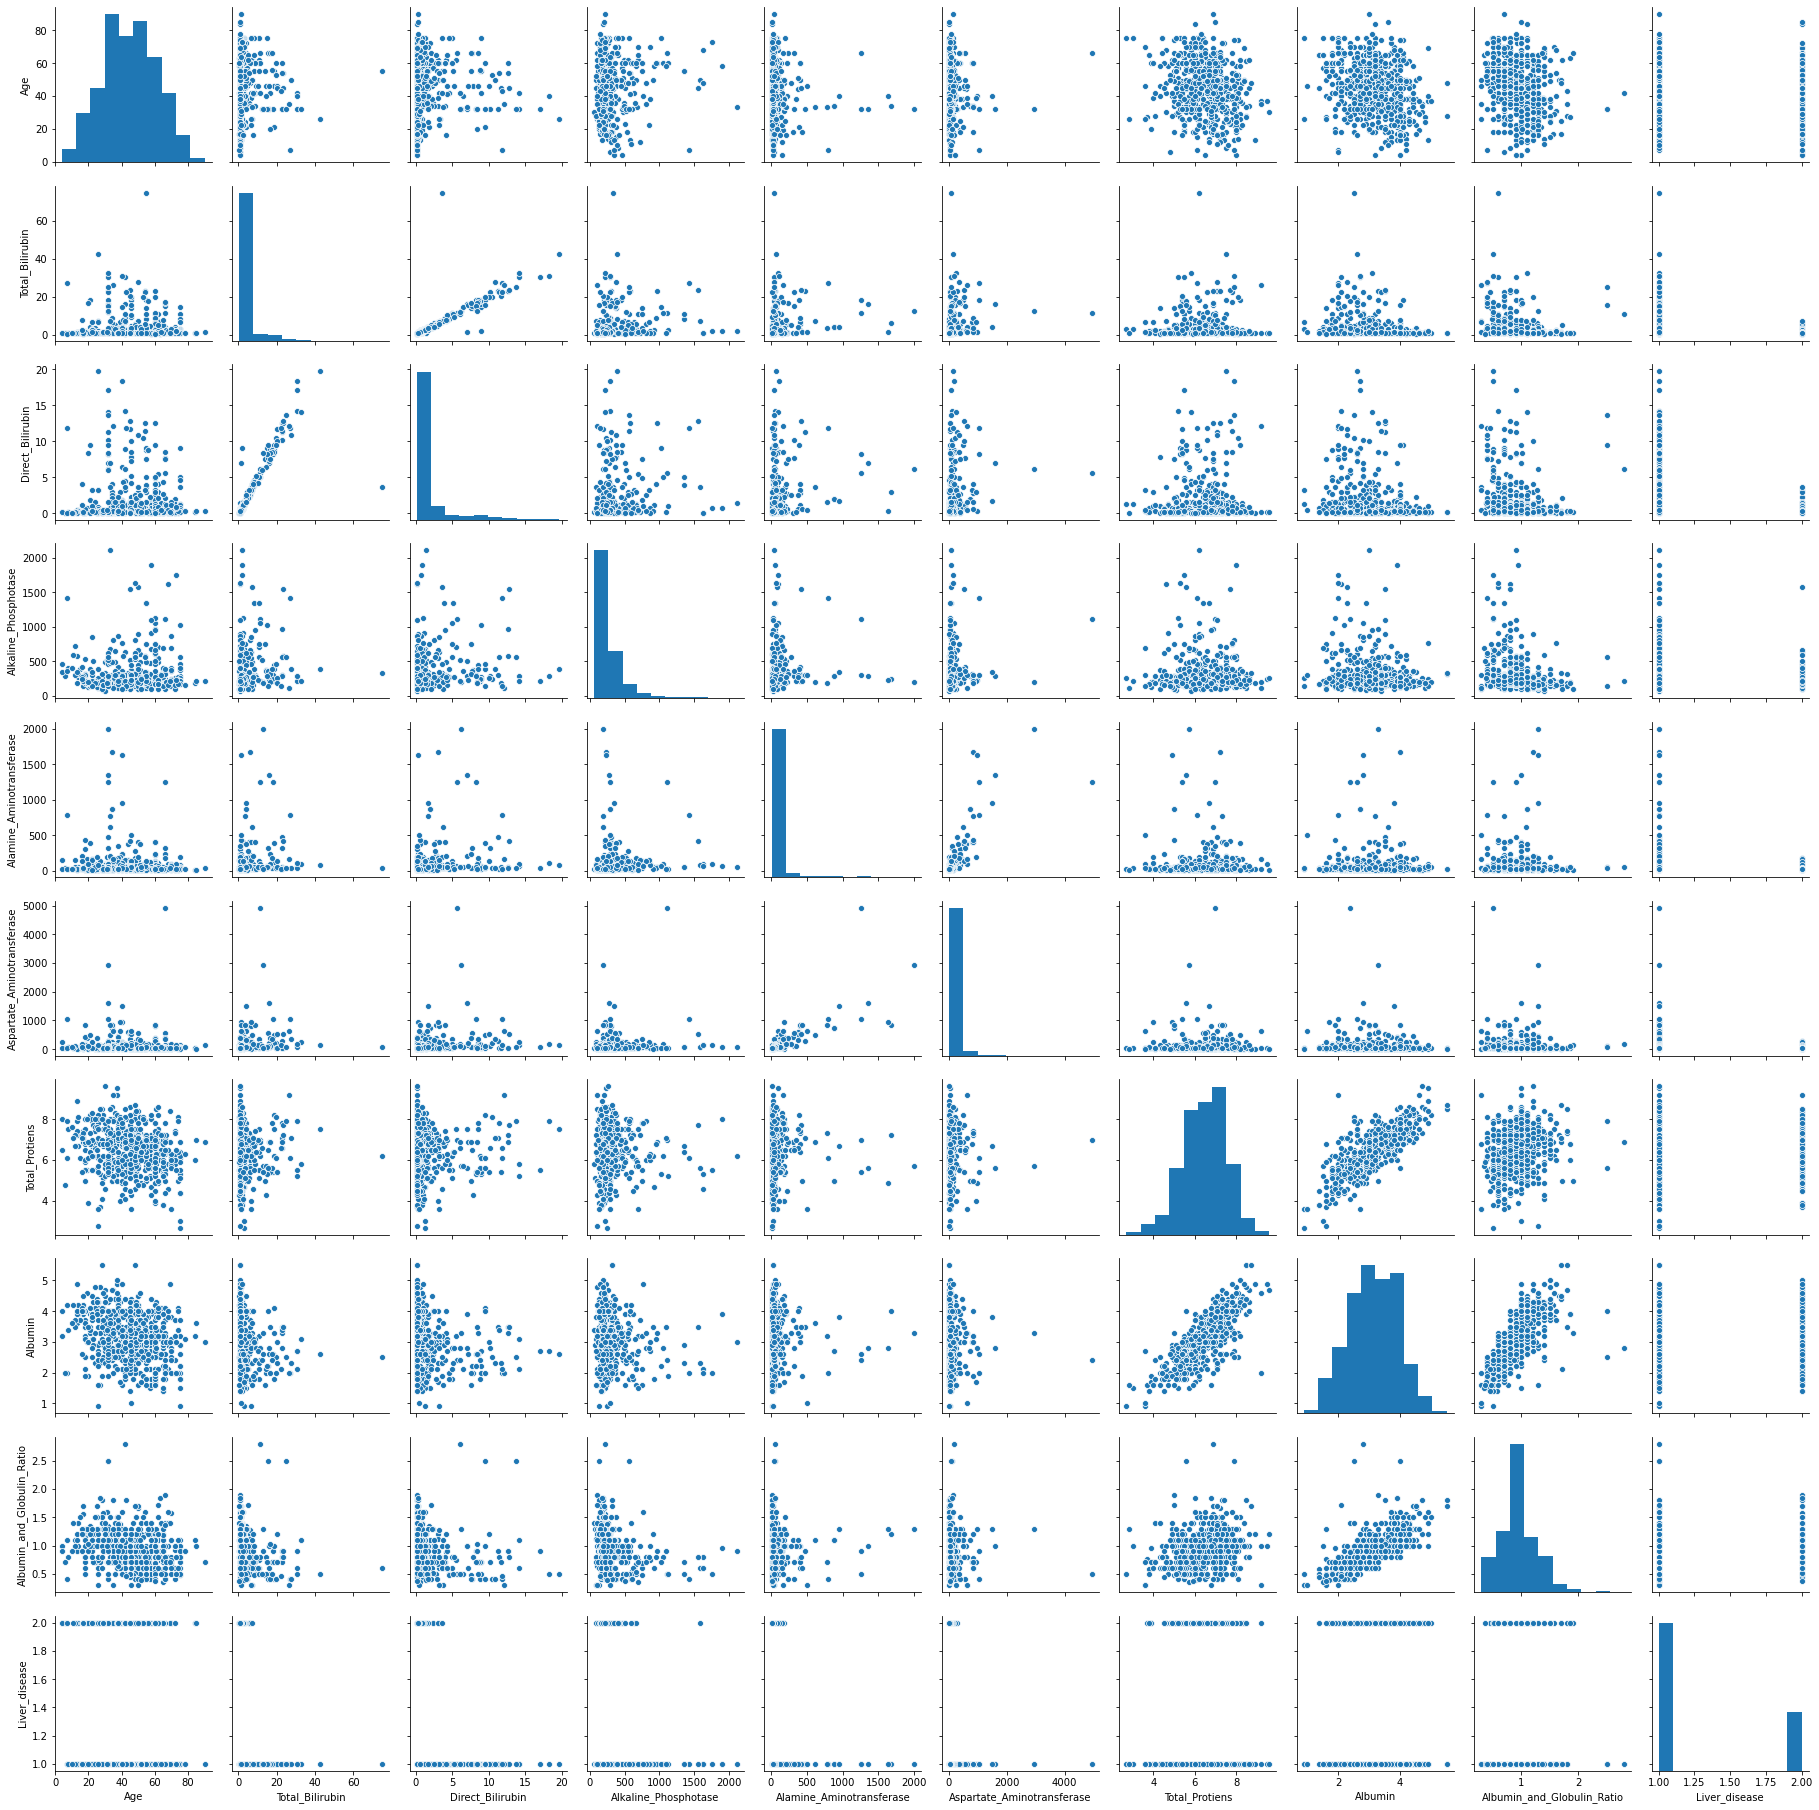

In [14]:
sns.pairplot(df)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


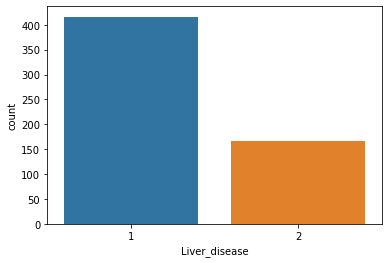

In [15]:
sns.countplot(data=df, x = 'Liver_disease', label='Count')

LD, NLD = df['Liver_disease'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


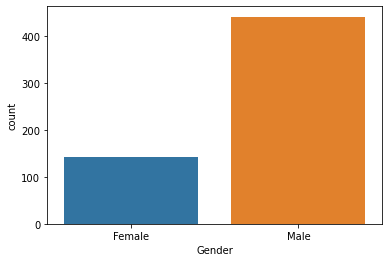

In [16]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

# Correlation

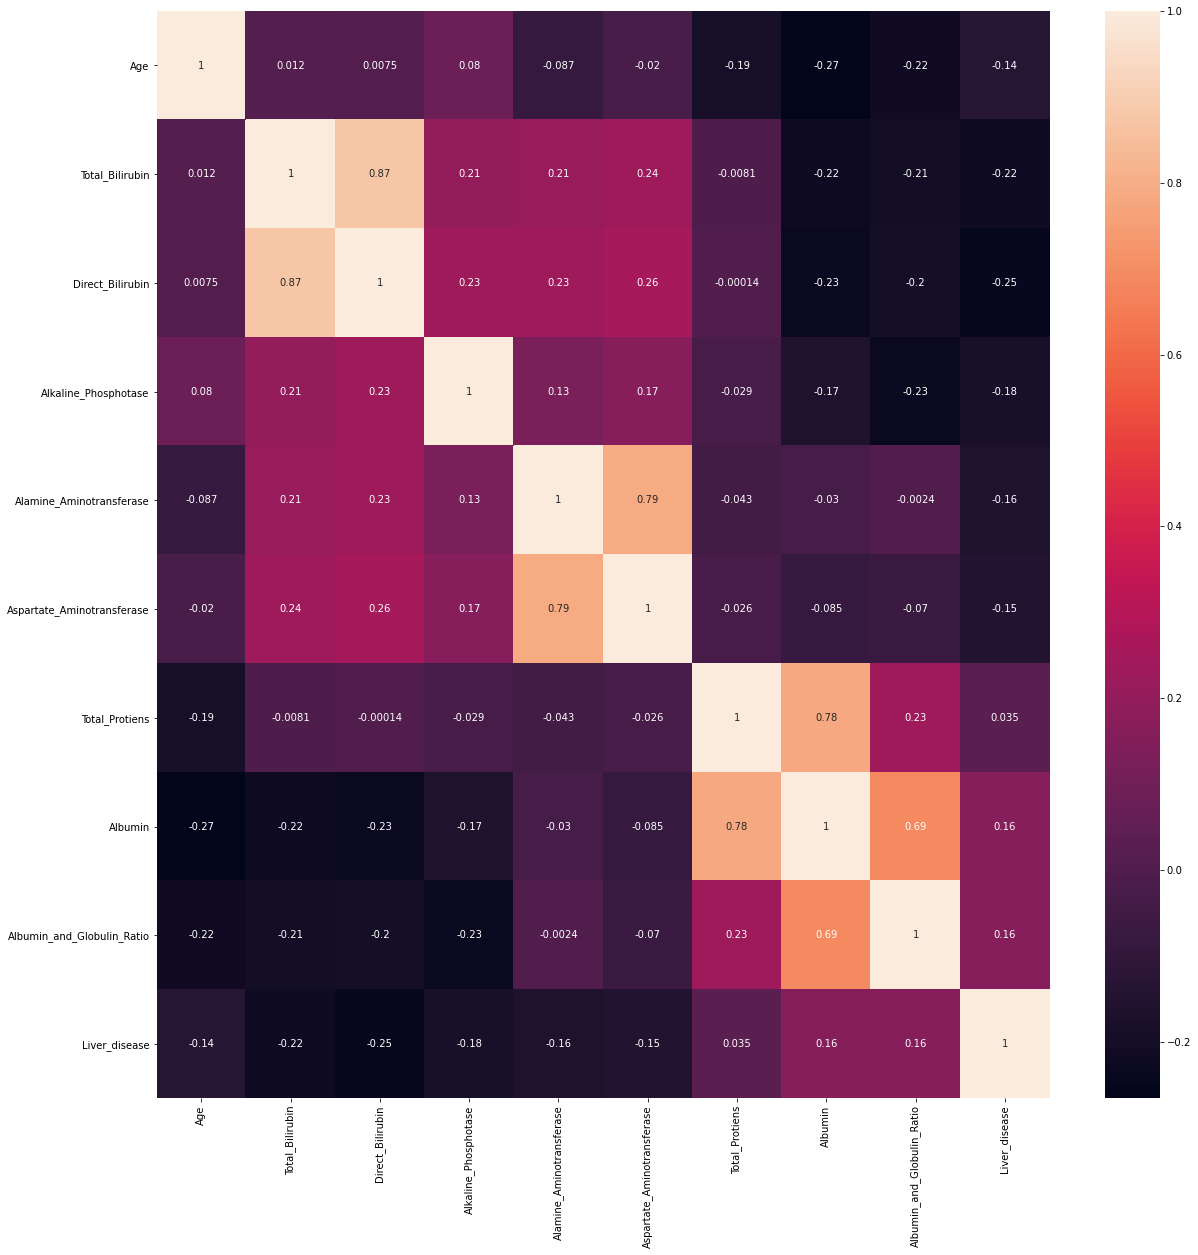

In [17]:
plt.figure(figsize = (20,20))
cor = df.corr()
sns.heatmap(df.corr(),annot = True)

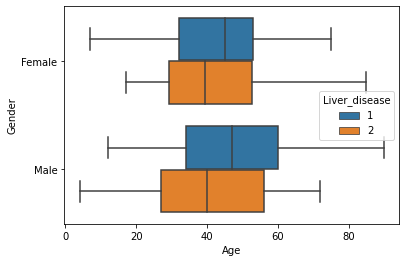

In [18]:
sns.boxplot(x="Age", y="Gender", hue="Liver_disease", data=df);


Age seems to be a factor for liver disease for both male and female genders



In [19]:
df[['Gender', 'Liver_disease','Age']].groupby(['Liver_disease','Gender'], as_index=False).count().sort_values(by='Liver_disease', ascending=False)

,Liver_disease,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [20]:
df[['Gender', 'Liver_disease','Age']].groupby(['Liver_disease','Gender'], as_index=False).mean().sort_values(by='Liver_disease', ascending=False)

,Liver_disease,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


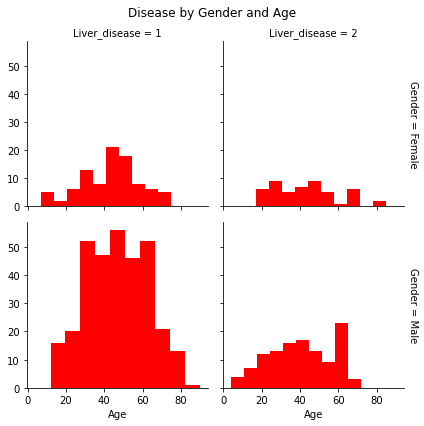

In [22]:
g = sns.FacetGrid(df, col="Liver_disease", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

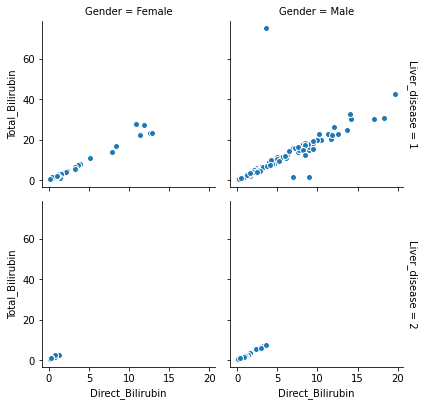

In [23]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

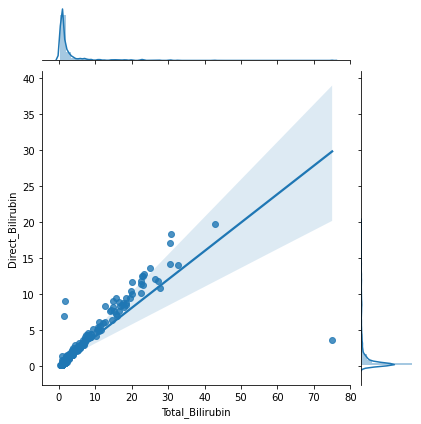

In [24]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

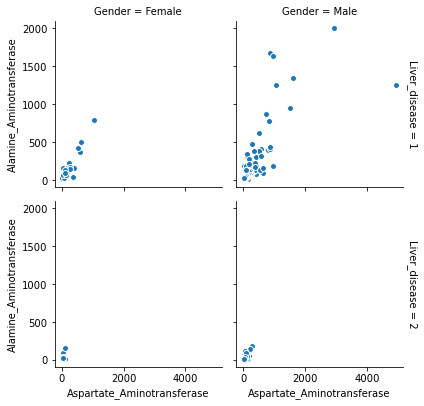

In [25]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

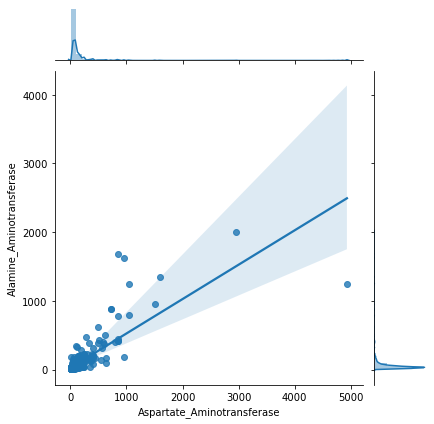

In [26]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

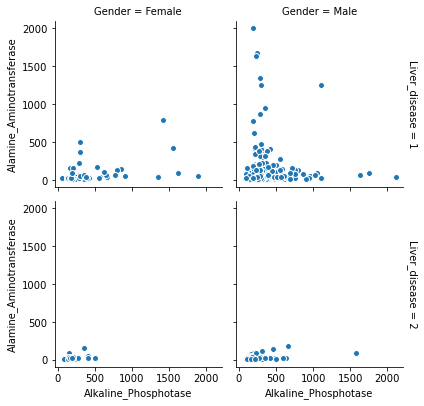

In [27]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

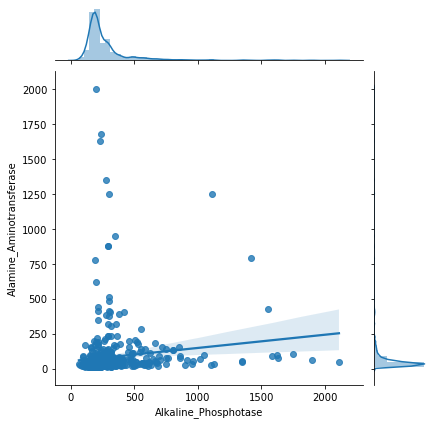

In [28]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase



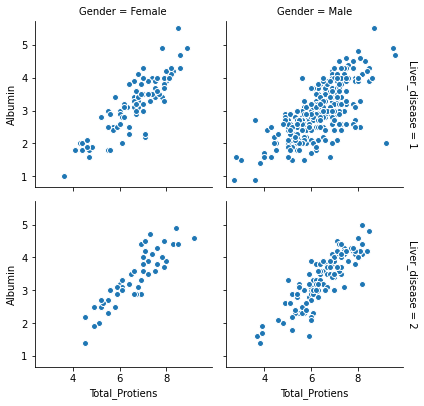

In [29]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

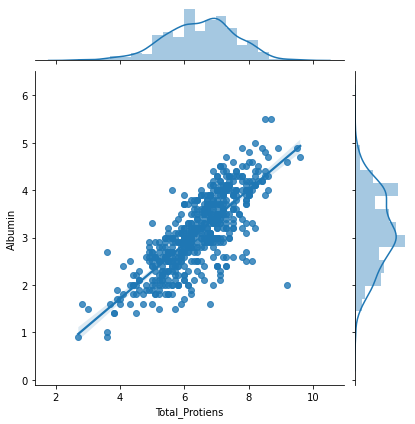

In [30]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

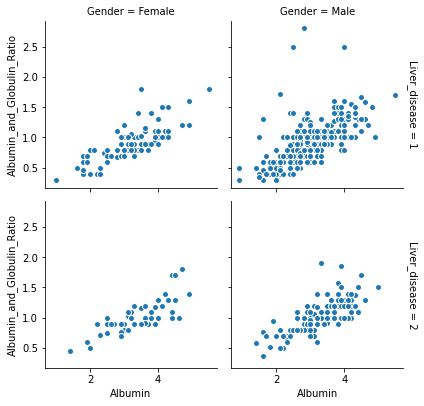

In [31]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

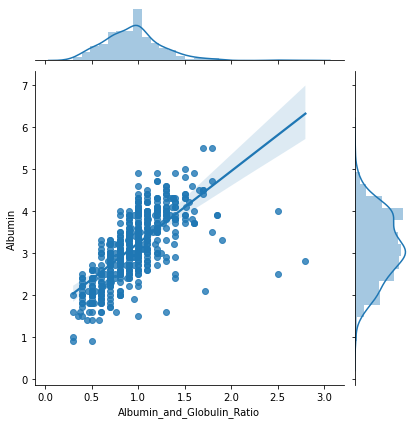

In [32]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

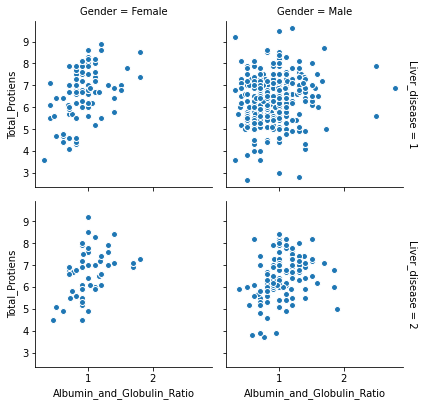

In [33]:
g = sns.FacetGrid(df, col="Gender", row="Liver_disease", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Observation

In [34]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Convert categorical variable "Gender" to indicator variables

In [35]:
df['Liver_disease'].value_counts()

1    416
2    167
Name: Liver_disease, dtype: int64

In [36]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [38]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [39]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [40]:
df["Albumin_and_Globulin_Ratio"] =df.Albumin_and_Globulin_Ratio.fillna(df
['Albumin_and_Globulin_Ratio'].mean())


In [41]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [42]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = df.drop(['Gender','Liver_disease'], axis=1)
X.head(5)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [43]:
y = df['Liver_disease'] # 1 for liver disease; 2 for no liver disease
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Liver_disease, Length: 583, dtype: int64

In [44]:
# Correlation
df_corr = X.corr()
df_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


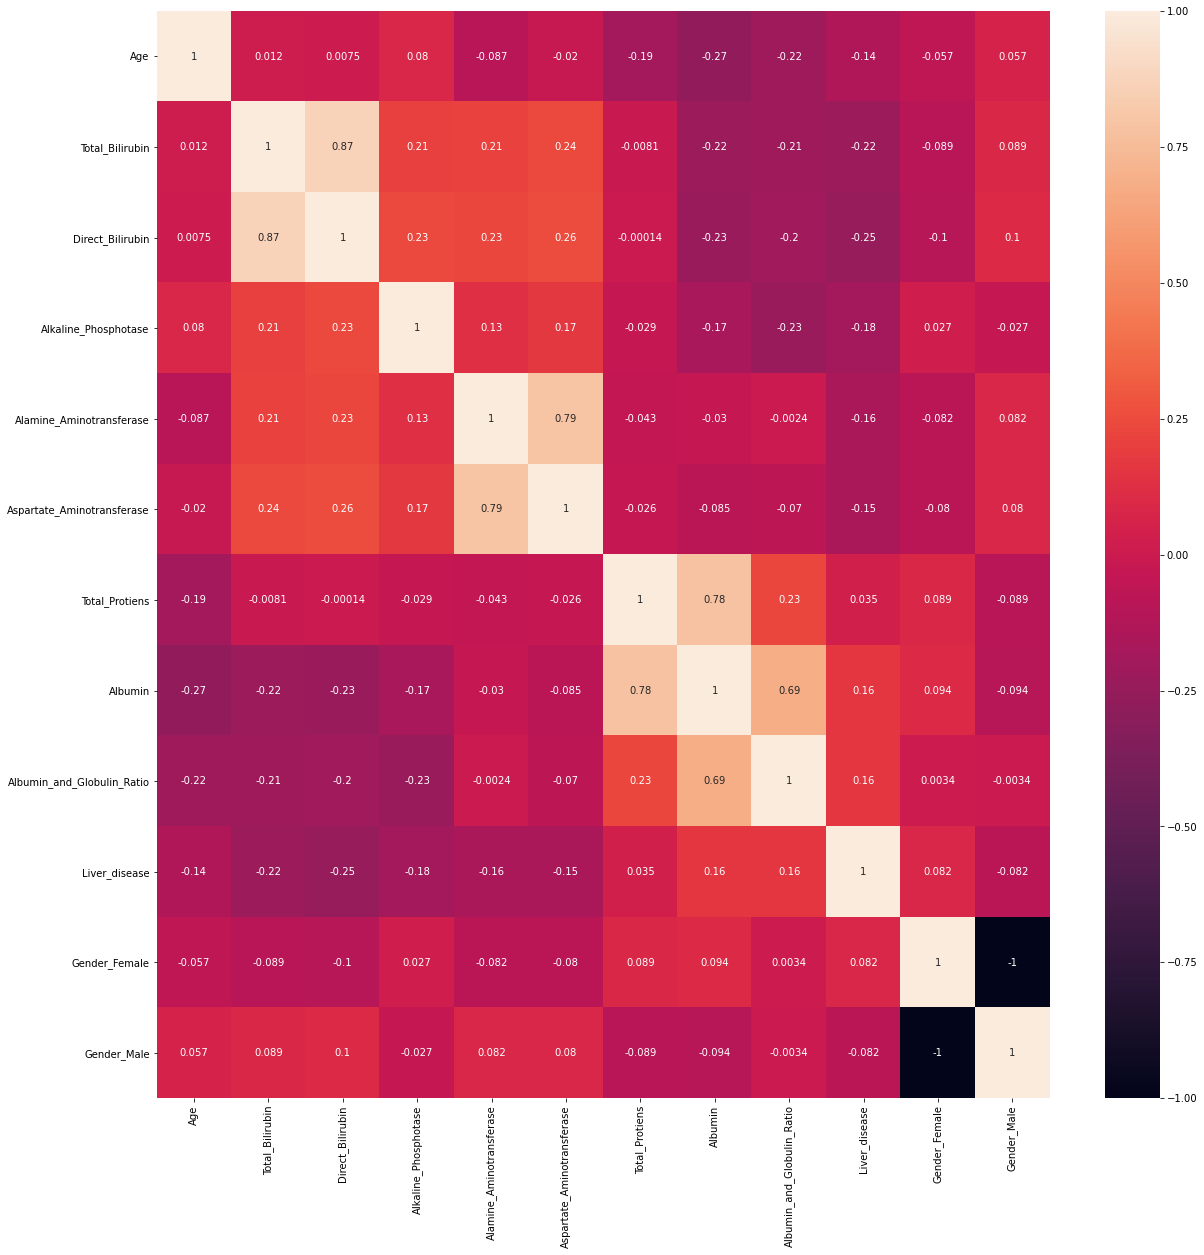

In [45]:
plt.figure(figsize = (20,20))
cor = df.corr()
sns.heatmap(df.corr(),annot = True)

In [46]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm
# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
df.shape

(583, 13)

# Removing Duplicated Rows

In [48]:
print("Duplicated Row in Train : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicated Row in Train :  13


In [49]:
y=y.map({1:0,2:1})

In [50]:
y.value_counts()

0    416
1    167
Name: Liver_disease, dtype: int64

In [51]:
df.shape

(570, 13)

In [52]:
y.value_counts()

0    416
1    167
Name: Liver_disease, dtype: int64

# Train Test Split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


# Undersampling

In [ ]:
!pip install imblearn

# Create a generalized function to calculate the metrics for the test set.

In [54]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

# Create a generalized function to calculate the kappa score for the test set.


In [55]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

# Define a function to plot the confusion matrix.

In [56]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

# Define a function to plot the ROC curve.

In [57]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# Create a generalized function to create a dataframe containing the scores for the models.

In [58]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

#  Build a logistic regression model using statsmodels `Logit()`.

In [59]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.488022
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Liver_disease   No. Observations:                  408
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                           10
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1762
Time:                        11:54:14   Log-Likelihood:                -199.11
converged:                       True   LL-Null:                       -241.70
Covariance Type:            nonrobust   LLR p-value:                 4.832e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0229      0.008     -2.947      0.003      

# Do predictions on the test set

In [60]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

246    0.028455
92     0.000032
386    0.428112
186    0.027063
389    0.289917
dtype: float64

In [61]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [62]:
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

# print the first five predictions
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

# Build a confusion matrix.

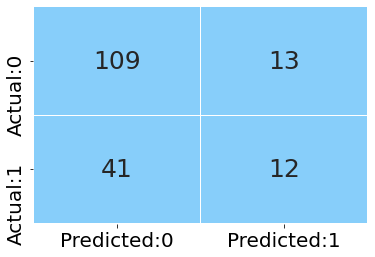

In [63]:
# call the function to plot the confusion matrix
# pass the logistic regression model to the function
plot_confusion_matrix(log_reg_model)

# **Calculate performance measures on the test set.**

In [64]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(log_reg_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       122
           1       0.48      0.23      0.31        53

    accuracy                           0.69       175
   macro avg       0.60      0.56      0.55       175
weighted avg       0.65      0.69      0.65       175



In [65]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
kappa_value = kappa_score(log_reg_model)

# print the kappa value
print(kappa_value)

0.14090909090909098


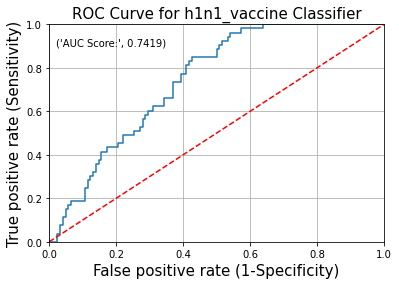

In [66]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression model to the function
plot_roc(log_reg_model)

Now, we tabulate the results, so that is easy for us to compare the models built.

In [67]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.741881,0.48,0.226415,0.691429,0.140909,0.307692


# Getting best threshold value for Imbalanced Dataset

In [68]:
# let 'y_pred_prob' be the predicted values of y
y_pred_roc = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_roc.head()

246    0.028455
92     0.000032
386    0.428112
186    0.027063
389    0.289917
dtype: float64

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)

In [70]:
# J-stats
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.267757


In [71]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_roc = ['0' if x < 0.26 else '1' for x in y_pred_prob]

In [72]:
# convert the predicted values to type 'float32'
y_pred_roc = np.array(y_pred_roc, dtype=np.float32)

# print the first five predictions
y_pred_roc[0:5]

array([0., 0., 1., 0., 1.], dtype=float32)

In [73]:
confusion_matrix(y_test, y_pred_roc)

array([[68, 54],
       [ 8, 45]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred_roc))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69       122
           1       0.45      0.85      0.59        53

    accuracy                           0.65       175
   macro avg       0.67      0.70      0.64       175
weighted avg       0.76      0.65      0.66       175



# Logistic Regression (using SGD)

In [75]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

# Do predictions on the test set

In [76]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]

In [77]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

# Build a confusion matrix.

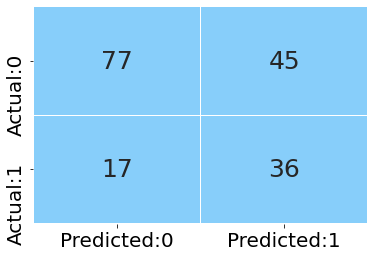

In [78]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

**Calculate performance measures on the test set.**

In [79]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       122
           1       0.44      0.68      0.54        53

    accuracy                           0.65       175
   macro avg       0.63      0.66      0.63       175
weighted avg       0.71      0.65      0.66       175



In [80]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.270048439181916


# **Plot the ROC curve.**

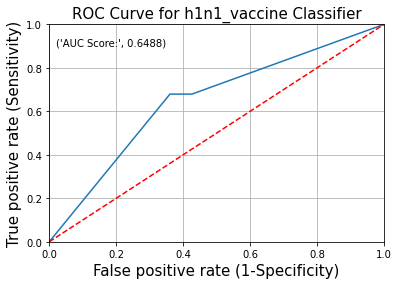

In [81]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

# Tabulate the results

In [82]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.741881,0.480000,0.226415,0.691429,0.140909,0.307692
1,Logistic Regression (SGD),0.648778,0.444444,0.679245,0.645714,0.270048,0.537313


# Conclusion and Interpretation

In [83]:
# print the 'score_card' to compare all the models
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.741881,0.480000,0.226415,0.691429,0.140909,0.307692
1,Logistic Regression (SGD),0.648778,0.444444,0.679245,0.645714,0.270048,0.537313


Let us plot the performance measures of the two models in the single graph.

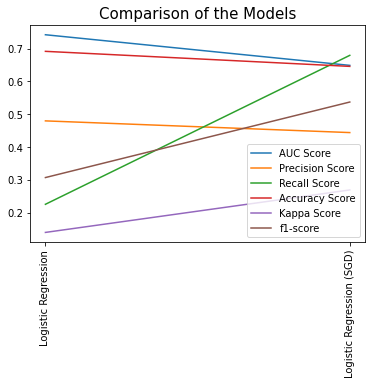

In [84]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()